# Urban Forestry Science :
## The Environmental Discomfort Index for Madrid

### 1. Import Matrix Elementary indicators

In [1]:
# import modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_matrix = pd.read_csv('../input_matrix/indicators_matrix.csv', encoding = "ISO-8859-1").round(2)
df_matrix = df_matrix.rename(columns={'Interpolate':'noise_pollution'})
df_matrix.head(3)

,CODBAR,NOMBRE,noise_pollution,air_qualityInterpolate,carbon_monoxideInterpolate,rainfallInterpolate,solar_radiationInterpolate,temperatureInterpolate,trees_densitytrees_density
0,172,San Cristobal,60.07,37.73,0.35,4.79,198.82,13.72,3172.64
1,173,Butarque,60.59,37.08,0.35,5.02,195.94,13.66,578.45
2,175,Los Angeles,59.59,38.67,0.35,4.47,203.28,13.83,3984.76


In [7]:
df_barrios = pd.read_csv('../input_matrix/barrios.csv', delimiter = ";", encoding = "ISO-8859-1")
df_barrios.head(3)

,geodb_oid,CODBAR,NOMBRE
0,108,172,San Cristobal
1,109,173,Butarque
2,111,175,Los Angeles


In [8]:
matrix = df_matrix.merge(df_barrios, left_on='CODBAR', right_on='CODBAR')
matrix = matrix.drop(columns = ['NOMBRE_x', 'geodb_oid'])
matrix = matrix.rename(columns={'CODBAR':'code_barrios', 'air_qualityInterpolate':'pm_10', 'carbon_monoxideInterpolate':'carbon_monoxide', 'rainfallInterpolate':'rainfall', 'solar_radiationInterpolate':'solar_radiation', 'temperatureInterpolate':'temperature', 'trees_densitytrees_density':'trees_density', 'NOMBRE_y':'name_barrios'})
matrix.head()

,code_barrios,noise_pollution,pm_10,carbon_monoxide,rainfall,solar_radiation,temperature,trees_density,name_barrios
0,172,60.07,37.73,0.35,4.79,198.82,13.72,3172.64,San Cristobal
1,173,60.59,37.08,0.35,5.02,195.94,13.66,578.45,Butarque
2,175,59.59,38.67,0.35,4.47,203.28,13.83,3984.76,Los Angeles
3,174,60.37,37.76,0.35,5.31,191.37,12.02,3810.34,Los Rosales
4,171,58.64,38.81,0.35,4.22,206.95,14.29,1144.74,"Villaverde Alto, Casco Historico de Villaverde"


In [9]:
# change order columns 
matrix = matrix[['code_barrios', 'name_barrios', 'noise_pollution', 'pm_10', 'carbon_monoxide', 'rainfall', 'solar_radiation', 'temperature', 'trees_density']]
matrix = matrix.dropna()
matrix.to_csv('../input_matrix/inputMatrix_updated.csv', index=False)
matrix.head(3)

,code_barrios,name_barrios,noise_pollution,pm_10,carbon_monoxide,rainfall,solar_radiation,temperature,trees_density
0,172,San Cristobal,60.07,37.73,0.35,4.79,198.82,13.72,3172.64
1,173,Butarque,60.59,37.08,0.35,5.02,195.94,13.66,578.45
2,175,Los Angeles,59.59,38.67,0.35,4.47,203.28,13.83,3984.76


### 2. Descriptive Statistics and Correlations

This is the correlation matrix of all elementary indicators


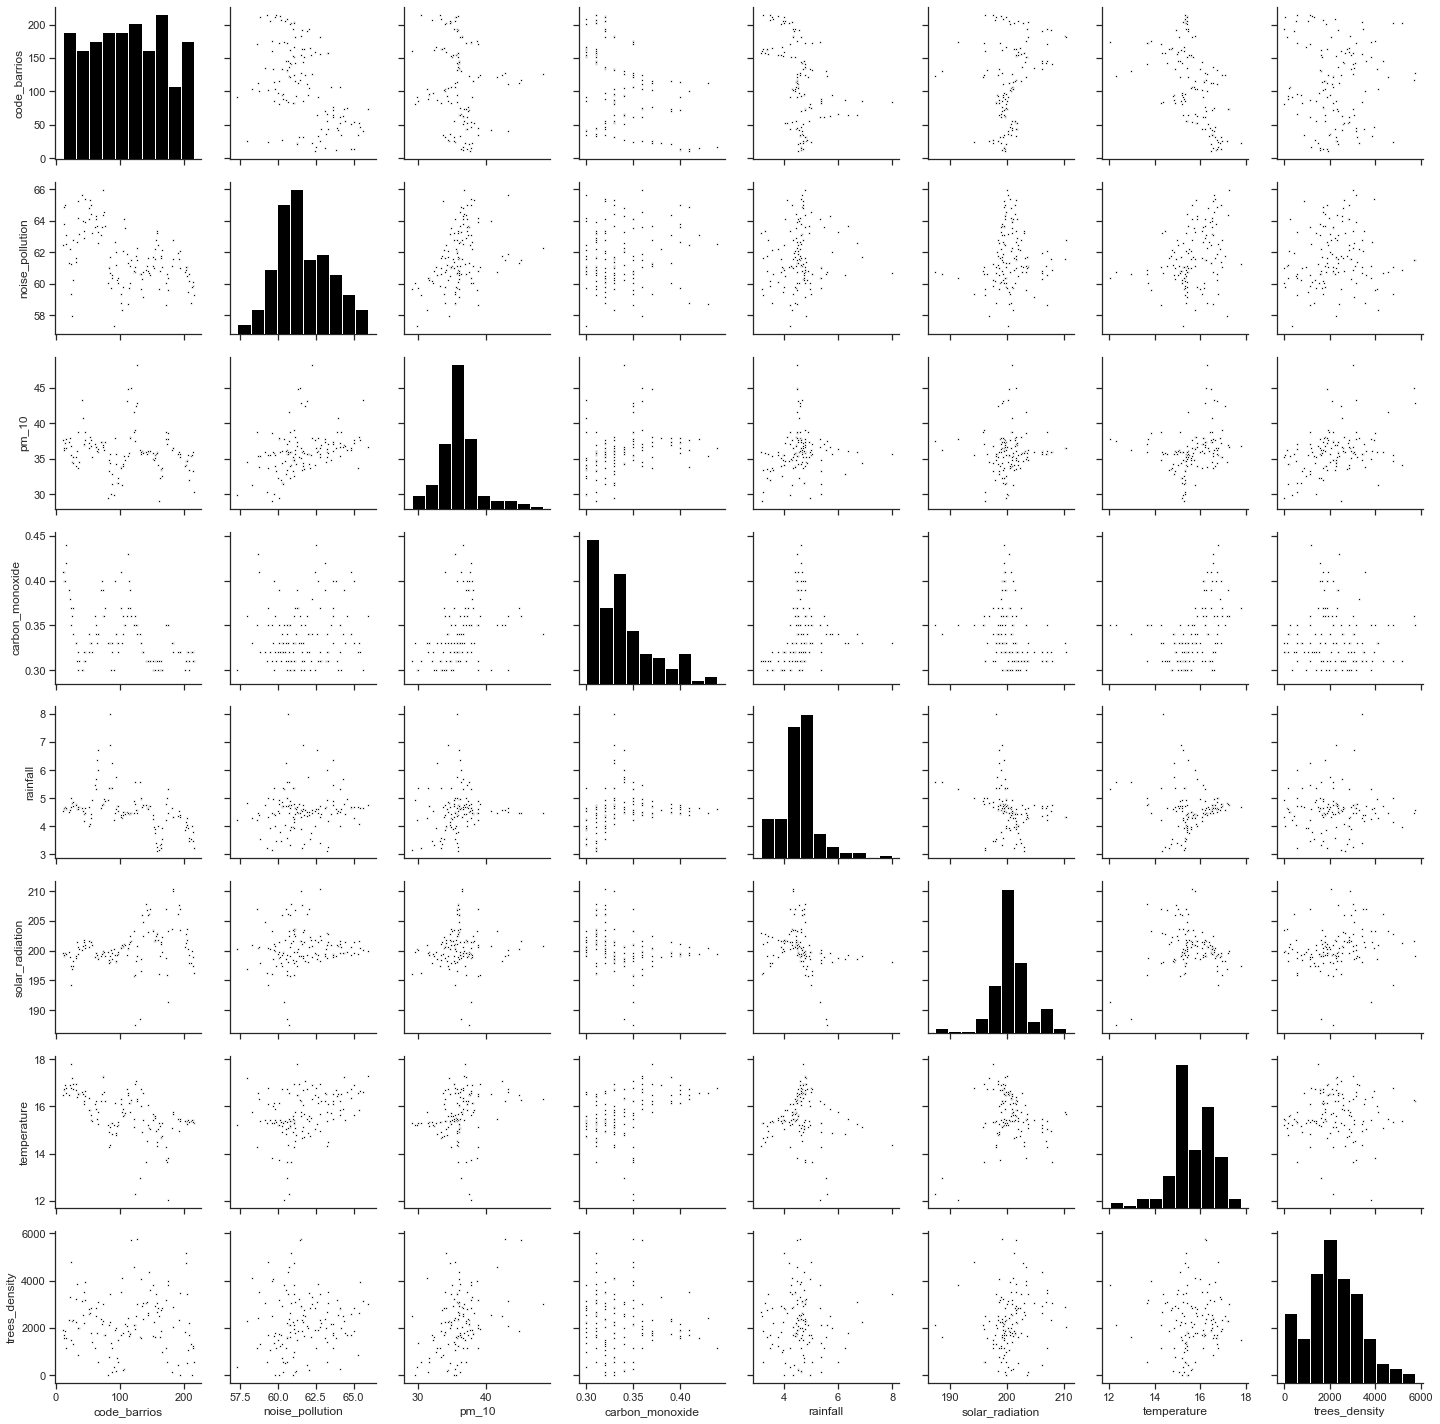

In [10]:
# this block defines the correlation matrix between all elementary indicators
print("This is the correlation matrix of all elementary indicators")
sns.set(style="ticks")
sns.axes_style("white")
sns_plot = sns.pairplot(matrix, plot_kws = {"s":4, 'color': 'black'}, diag_kws= {'color': 'black'})

### 3. Polarity Elementary Indicators

| the composite index | polarity elementary indicators | concordance | trasformation |
| --- | --- | --- | --- |
| environmental discomfort index (-) | noise pollution (-) | concordant | does not change (-)
| ... | particulate matter 10 (-) | concordant | does not change (-)
| ... | carbon monoxide (-) | concordant | does not change (-)
| ... | rainfall (-) | concordant | does not change (-)
| ... | solar radiation (-) | concordant | does not change (-)
| ... | temperature (-) | concordant | does not change (-)
| ... | trees density (+) | discordant | change (-)

### 4. Polarity Transformation Elementary Indicators

##### This block defines the linear transformation for the tree density indicator (necessary for the aggragetion in the following step)
formula: $x_{ij}'$ = max{$x_{ij}$} - $x_{ij}$

In [11]:
# these rows define the linear trasformation of discordant columns for our phenomenon
# trees density
transform_trees_density = matrix['trees_density'].max() - matrix[['trees_density']]

In [12]:
# this block combines again the matrix, transformed columns and not transformed columns
# now the matrix has the same polarity of our phenomenon
from functools import reduce
df_all = [matrix[['code_barrios']], matrix[['name_barrios']], matrix[['noise_pollution']], matrix[['pm_10']], matrix[['carbon_monoxide']], matrix[['rainfall']], matrix[['solar_radiation']], matrix[['temperature']], transform_trees_density]
matrix_trans_linear = reduce(lambda  left,right: pd.merge(left,right,how='outer', left_index=True, right_index=True), df_all)
print("This is the matrix where linear trasformation is applied")
matrix_trans_linear.head()

This is the matrix where linear trasformation is applied


,code_barrios,name_barrios,noise_pollution,pm_10,carbon_monoxide,rainfall,solar_radiation,temperature,trees_density
0,172,San Cristobal,60.07,37.73,0.35,4.79,198.82,13.72,2580.86
1,173,Butarque,60.59,37.08,0.35,5.02,195.94,13.66,5175.05
2,175,Los Angeles,59.59,38.67,0.35,4.47,203.28,13.83,1768.74
3,174,Los Rosales,60.37,37.76,0.35,5.31,191.37,12.02,1943.16
4,171,"Villaverde Alto, Casco Historico de Villaverde",58.64,38.81,0.35,4.22,206.95,14.29,4608.76


### 5. Normalization

##### This block defines the MPI normalization (Mazziotta Pareto Index)
formula: $z_{ij}$ = $\frac{(x_{ij} - {M_{x}})}{S_{x}}$S+M

where: $M_{x}$ = $\frac{\sum_{i=1}^{n} x_{ij} }{n}$ e $S_{x}$ =  $\sqrt{\frac{\sum_{i=1}^{n} (x_{ij}-{M_{x})^2}}{n}}$ 

In [13]:
# let's use the matrix linearly transformed as starting point
# creating variables needed for the formula abovementioned 
x_sigma_z = matrix_trans_linear.drop(columns=['code_barrios', 'name_barrios'], axis=1).std()
x_media_z = matrix_trans_linear.drop(columns=['code_barrios', 'name_barrios'], axis=1).mean()
x = matrix_trans_linear.drop(columns=['code_barrios', 'name_barrios'], axis=1)
s = 10
m = 100

# the MPI normalization is applied to all columns 
MPI = ((x - x_media_z) / x_sigma_z)*s + m

In [14]:
# insert again the zu column
df_MPI = matrix[['name_barrios']].merge(MPI, left_index=True, right_index=True)
df_MPI = matrix[['code_barrios']].merge(df_MPI, left_index=True, right_index=True)
print("This is the normalized matrix with MPI (Mazziotta Pareto Index)")
df_MPI.head(3)

This is the normalized matrix with MPI (Mazziotta Pareto Index)


,code_barrios,name_barrios,noise_pollution,pm_10,carbon_monoxide,rainfall,solar_radiation,temperature,trees_density
0,172,San Cristobal,91.121198,105.968363,104.043998,102.933331,95.041922,79.703747,92.101559
1,173,Butarque,94.013294,103.734392,104.043998,106.143692,86.372178,79.073822,113.838838
2,175,Los Angeles,88.451571,109.199029,104.043998,98.466741,108.467982,80.858610,85.296630


### 6. Aggregation

#### This block defines the aggregation for normalization with MPI (Mazziotta Pareto Index)
##### aggregation MPI is used (similar to geometric mean because the arithmetic mean is corrected by a penalty function)
formula: $cv_{i}$ = $\frac{S_{z}}{M_{z}}$

where: $M_{z}$ = $\frac{\sum_{j=1}^{m} z_{ij} }{m}$ e $S_{z}$ =  $\sqrt{\frac{\sum_{j=1}^{m} (z_{ij}-\bar{M_{z})^2}}{m}}$

In [23]:
# all variables needed for the formula abovementioned are defined
# drop code barrios column 
df_MPI = df_MPI.drop(columns=['code_barrios'], axis=1)
# mean of the z elements of the standardized matrix
z_media = df_MPI.mean(axis=1)
# standard deviation of elements z of standardized matrix
z_sigma = df_MPI.std(axis=1)
# compute cv
cv = z_sigma / z_media

In [24]:
z_media.head()

0     95.844874
1     98.174316
2     96.397794
3     90.617958
4    100.881005
dtype: float64

##### The composite index is:

$MPI^{+/-}$ = $M_{z}$ +/- $S_{z}$ $cv_{i}$

$M_{z}$ is the mean of the z elements in horizontal and $S_{z}$ is the horizontal sigma

where the sign +/- depends on our phenomenon (our phenomenon is negative so we use +)

In [26]:
# calculating index MPI using positive sign (because our phenomenon is negative)
MPI_agg = z_media + z_sigma*cv
# transform the MPI index from series to dataframe
MPI_agg = MPI_agg.to_frame(name='mpi_index')
MPI_agg.head()

,mpi_index
0,96.744701
1,99.694893
2,97.781212
3,94.247066
4,102.667883


In [30]:
df_MPI_index = df_MPI.merge(MPI_agg, left_index=True, right_index=True)
df_MPI_index = df_MPI_index.round(2)
print("This is the matrix with the composite index computed with MPI normalization and MPI aggregation")
# export csv
df_MPI_index.to_csv('../output_matrix/df_mpi_index.csv', index=False)
# prints first rows
df_MPI_index.head(50)

This is the matrix with the composite index computed with MPI normalization and MPI aggregation


,name_barrios,noise_pollution,pm_10,carbon_monoxide,rainfall,solar_radiation,temperature,trees_density,mpi_index
0,San Cristobal,91.12,105.97,104.04,102.93,95.04,79.70,92.10,96.74
1,Butarque,94.01,103.73,104.04,106.14,86.37,79.07,113.84,99.69
2,Los Angeles,88.45,109.20,104.04,98.47,108.47,80.86,85.30,97.78
3,Los Rosales,92.79,106.07,104.04,110.19,72.61,61.86,86.76,94.25
4,"Villaverde Alto, Casco Historico de Villaverde",83.17,109.68,104.04,94.98,119.52,85.69,109.09,102.67
5,Orcasitas,94.90,118.99,104.04,98.33,108.68,97.97,80.49,101.92
6,Ensanche de Vallecas,99.35,101.60,97.77,96.37,128.85,101.33,94.56,104.18
7,Buenavista,97.02,107.21,110.31,98.19,105.88,101.23,103.83,103.61
8,Cuatro Vientos,113.48,97.79,104.04,98.89,101.72,99.97,116.42,105.14
9,San Fermin,94.96,105.11,104.04,114.10,60.66,64.90,100.88,96.82


In [28]:
df_MPI_index['mpi_index'].describe()

count    131.000000
mean     100.939924
std        4.337737
min       88.910000
25%       97.260000
50%      100.900000
75%      104.190000
max      109.450000
Name: mpi_index, dtype: float64

In [22]:
df_MPI_index.dtypes

code_barrios         int64
name_barrios        object
noise_pollution    float64
pm_10              float64
carbon_monoxide    float64
rainfall           float64
solar_radiation    float64
temperature        float64
trees_density      float64
mpi_index          float64
dtype: object